In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import io
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/My Drive/Colab Notebooks/Tensor_decom_sample/data/'

In [ ]:
data=pd.read_csv(data_path + 'tripcsvbame.csv')

In [ ]:
data

,usage-stats/
0,01aJourneyDataExtract10Jan16-23Jan16.csv
1,01b Journey Data Extract 24Jan16-06Feb16.csv
2,01bJourneyDataExtract24Jan16-06Feb16.csv
3,02aJourneyDataExtract07Fe16-20Feb2016.csv
4,02bJourneyDataExtract21Feb16-05Mar2016.csv
...,...
399,97JourneyDataExtract14Feb2018-20Feb2018.csv
400,98JourneyDataExtract21Feb2018-27Feb2018.csv
401,99JourneyDataExtract28Feb2018-06Mar2018.csv
402,9a-Journey-Data-Extract-23Aug15-05Sep15.csv


In [ ]:
data['usage-stats/'][301:306]

301     351JourneyDataExtract02Jan2023-08Jan2023.csv
302     352JourneyDataExtract09Jan2023-15Jan2023.csv
303     353JourneyDataExtract16Jan2023-22Jan2023.csv
304     354JourneyDataExtract23Jan2023-29Jan2023.csv
305     355JourneyDataExtract30Jan2023-05Feb2023.csv
Name: usage-stats/, dtype: object

In [ ]:
data_2023=data['usage-stats/'][301:306]
frames=[]
for x in data_2023:
    frames.append(pd.read_csv(data_path + x[1:]))

result = pd.concat(frames)
result.columns

Index(['Number', 'Start date', 'Start station number', 'Start station',
       'End date', 'End station number', 'End station', 'Bike number',
       'Bike model', 'Total duration', 'Total duration (ms)'],
      dtype='object')

In [ ]:
dict_columns = {
    "Number": "Rental Id",
    "Total duration (ms)": "Duration",
    "Bike number" : "Bike Id",
    "Start station" : 'StartStation Name',
    'End station': 'EndStation Name',
    'End Date': 'End date',
    'Start Date': 'Start date'
}

In [ ]:
result_general = result.rename(columns=dict_columns)
result_general['Duration'] = result_general['Duration']/1000
result_general

,Rental Id,Start date,Start station number,StartStation Name,End date,End station number,EndStation Name,Bike Id,Bike model,Total duration,Duration
0,127804092,2023-01-08 23:59,200252,"Bow Church Station, Bow",2023-01-09 00:05,200249,"Queen Mary's, Mile End",30139,CLASSIC,6m 46s,406.323
1,127804093,2023-01-08 23:59,960,"Hop Exchange, The Borough",2023-01-09 00:06,22180,"Cheapside, Bank",52971,CLASSIC,7m 15s,435.048
2,127804087,2023-01-08 23:58,1152,"Marylebone Lane, Marylebone",2023-01-09 00:03,1164,"Portland Place, Marylebone",30873,CLASSIC,5m 9s,309.267
3,127804088,2023-01-08 23:58,300051,"Hibbert Street, Battersea",2023-01-09 00:03,200187,"Morie Street, Wandsworth",55190,CLASSIC,5m 9s,309.019
4,127804089,2023-01-08 23:58,1201,"Bank of England Museum, Bank",2023-01-09 00:13,22166,"Albert Gardens, Stepney",53576,CLASSIC,15m 1s,901.787
...,...,...,...,...,...,...,...,...,...,...,...
155441,128230322,2023-01-30 00:03,1113,"Trebovir Road, Earl's Court",2023-01-30 00:10,200181,"Richmond Way, Shepherd's Bush",52852,CLASSIC,7m 9s,429.495
155442,128230320,2023-01-30 00:01,2666,"Howick Place, Westminster",2023-01-30 00:23,200256,"Sutton Street, Shadwell",51794,CLASSIC,21m 49s,1309.664
155443,128230321,2023-01-30 00:01,1090,"Warren Street Station, Euston",2023-01-30 00:08,1225,"George Street, Marylebone",56197,CLASSIC,6m 55s,415.212
155444,128230318,2023-01-30 00:00,300242,"Allington Street, Victoria",2023-01-30 00:13,300075,"Upcerne Road, West Chelsea",57886,CLASSIC,13m 6s,786.492


In [ ]:
date_format = '%d/%m/%Y %H:%M:%S'
result_general['End date']=pd.to_datetime(result_general['End date'])
result_general['Start date']=pd.to_datetime(result_general['Start date'])
result_general

,Rental Id,Start date,Start station number,StartStation Name,End date,End station number,EndStation Name,Bike Id,Bike model,Total duration,Duration
0,127804092,2023-01-08 23:59:00,200252,"Bow Church Station, Bow",2023-01-09 00:05:00,200249,"Queen Mary's, Mile End",30139,CLASSIC,6m 46s,406.323
1,127804093,2023-01-08 23:59:00,960,"Hop Exchange, The Borough",2023-01-09 00:06:00,22180,"Cheapside, Bank",52971,CLASSIC,7m 15s,435.048
2,127804087,2023-01-08 23:58:00,1152,"Marylebone Lane, Marylebone",2023-01-09 00:03:00,1164,"Portland Place, Marylebone",30873,CLASSIC,5m 9s,309.267
3,127804088,2023-01-08 23:58:00,300051,"Hibbert Street, Battersea",2023-01-09 00:03:00,200187,"Morie Street, Wandsworth",55190,CLASSIC,5m 9s,309.019
4,127804089,2023-01-08 23:58:00,1201,"Bank of England Museum, Bank",2023-01-09 00:13:00,22166,"Albert Gardens, Stepney",53576,CLASSIC,15m 1s,901.787
...,...,...,...,...,...,...,...,...,...,...,...
155441,128230322,2023-01-30 00:03:00,1113,"Trebovir Road, Earl's Court",2023-01-30 00:10:00,200181,"Richmond Way, Shepherd's Bush",52852,CLASSIC,7m 9s,429.495
155442,128230320,2023-01-30 00:01:00,2666,"Howick Place, Westminster",2023-01-30 00:23:00,200256,"Sutton Street, Shadwell",51794,CLASSIC,21m 49s,1309.664
155443,128230321,2023-01-30 00:01:00,1090,"Warren Street Station, Euston",2023-01-30 00:08:00,1225,"George Street, Marylebone",56197,CLASSIC,6m 55s,415.212
155444,128230318,2023-01-30 00:00:00,300242,"Allington Street, Victoria",2023-01-30 00:13:00,300075,"Upcerne Road, West Chelsea",57886,CLASSIC,13m 6s,786.492


In [ ]:
results_f = result_general[result_general['Duration']<3600]

In [ ]:
results_f

,Rental Id,Start date,Start station number,StartStation Name,End date,End station number,EndStation Name,Bike Id,Bike model,Total duration,Duration
0,127804092,2023-01-08 23:59:00,200252,"Bow Church Station, Bow",2023-01-09 00:05:00,200249,"Queen Mary's, Mile End",30139,CLASSIC,6m 46s,406.323
1,127804093,2023-01-08 23:59:00,960,"Hop Exchange, The Borough",2023-01-09 00:06:00,22180,"Cheapside, Bank",52971,CLASSIC,7m 15s,435.048
2,127804087,2023-01-08 23:58:00,1152,"Marylebone Lane, Marylebone",2023-01-09 00:03:00,1164,"Portland Place, Marylebone",30873,CLASSIC,5m 9s,309.267
3,127804088,2023-01-08 23:58:00,300051,"Hibbert Street, Battersea",2023-01-09 00:03:00,200187,"Morie Street, Wandsworth",55190,CLASSIC,5m 9s,309.019
4,127804089,2023-01-08 23:58:00,1201,"Bank of England Museum, Bank",2023-01-09 00:13:00,22166,"Albert Gardens, Stepney",53576,CLASSIC,15m 1s,901.787
...,...,...,...,...,...,...,...,...,...,...,...
155441,128230322,2023-01-30 00:03:00,1113,"Trebovir Road, Earl's Court",2023-01-30 00:10:00,200181,"Richmond Way, Shepherd's Bush",52852,CLASSIC,7m 9s,429.495
155442,128230320,2023-01-30 00:01:00,2666,"Howick Place, Westminster",2023-01-30 00:23:00,200256,"Sutton Street, Shadwell",51794,CLASSIC,21m 49s,1309.664
155443,128230321,2023-01-30 00:01:00,1090,"Warren Street Station, Euston",2023-01-30 00:08:00,1225,"George Street, Marylebone",56197,CLASSIC,6m 55s,415.212
155444,128230318,2023-01-30 00:00:00,300242,"Allington Street, Victoria",2023-01-30 00:13:00,300075,"Upcerne Road, West Chelsea",57886,CLASSIC,13m 6s,786.492


In [ ]:
len(result_general)

667093

In [ ]:
len(results_f)

656993

In [ ]:
result=results_f.dropna()
new_result=result.set_index('Start date').groupby([pd.Grouper(freq='h'), 'StartStation Name', 'EndStation Name']).count()
new_result

Rental Id  \
Start date          StartStation Name                EndStation Name                                     
2023-01-02 00:00:00 Ackroyd Drive, Bow               Alpha Grove, Millwall                           1   
                                                     Devons Road, Bow                                1   
                    Albert Embankment, Vauxhall      Park Street, Bankside                           2   
                                                     Thorndike Close, West Chelsea                   1   
                    Bancroft Road, Bethnal Green     Bancroft Road, Bethnal Green                    2   
...                                                                                                ...   
2023-02-05 23:00:00 Westbourne Park Road, Portobello Hereford Road, Bayswater                        2   
                    Westferry DLR, Limehouse         Tanner Street, Bermondsey                       1   
                    Westminster Pier, Westminster    Kennington Road  , Vauxhall                     1   
                    World's End Place, West Chelsea  Queen's Gate (South), South Kensington          1   
                    York Hall, Bethnal Green         Gunmakers Lane, Old Ford                        1   

                                                                                             Start station number  \
Start date          StartStation Name                EndStation Name                                                
2023-01-02 00:00:00 Ackroyd Drive, Bow               Alpha Grove, Millwall                                      1   
                                                     Devons Road, Bow                                           1   
                    Albert Embankment, Vauxhall      Park Street, Bankside                                      2   
                                                     Thorndike Close, West Chelsea                              1   
                    Bancroft Road, Bethnal Green     Bancroft Road, Bethnal Green                               2   
...                                                                                                           ...   
2023-02-05 23:00:00 Westbourne Park Road, Portobello Hereford Road, Bayswater                                   2   
                    Westferry DLR, Limehouse         Tanner Street, Bermondsey                                  1   
                    Westminster Pier, Westminster    Kennington Road  , Vauxhall                                1   
                    World's End Place, West Chelsea  Queen's Gate (South), South Kensington                     1   
                    York Hall, Bethnal Green         Gunmakers Lane, Old Ford                                   1   

                                                                                             End date  \
Start date          StartStation Name                EndStation Name                                    
2023-01-02 00:00:00 Ackroyd Drive, Bow               Alpha Grove, Millwall                          1   
                                                     Devons Road, Bow                               1   
                    Albert Embankment, Vauxhall      Park Street, Bankside                          2   
                                                     Thorndike Close, West Chelsea                  1   
                    Bancroft Road, Bethnal Green     Bancroft Road, Bethnal Green                   2   
...                                                                                               ...   
2023-02-05 23:00:00 Westbourne Park Road, Portobello Hereford Road, Bayswater                       2   
                    Westferry DLR, Limehouse         Tanner Street, Bermondsey                      1   
                    Westminster Pier, Westminster    Kennington Road  , Vauxhall                    1   
                    World's End Place

In [ ]:
new_result.columns

Index(['Rental Id', 'Start station number', 'End date', 'End station number',
       'Bike Id', 'Bike model', 'Total duration', 'Duration'],
      dtype='object')

In [ ]:
new_result['No of trips']=new_result['Duration']

In [ ]:
new_result

Rental Id  \
Start date          StartStation Name                EndStation Name                                     
2023-01-02 00:00:00 Ackroyd Drive, Bow               Alpha Grove, Millwall                           1   
                                                     Devons Road, Bow                                1   
                    Albert Embankment, Vauxhall      Park Street, Bankside                           2   
                                                     Thorndike Close, West Chelsea                   1   
                    Bancroft Road, Bethnal Green     Bancroft Road, Bethnal Green                    2   
...                                                                                                ...   
2023-02-05 23:00:00 Westbourne Park Road, Portobello Hereford Road, Bayswater                        2   
                    Westferry DLR, Limehouse         Tanner Street, Bermondsey                       1   
                    Westminster Pier, Westminster    Kennington Road  , Vauxhall                     1   
                    World's End Place, West Chelsea  Queen's Gate (South), South Kensington          1   
                    York Hall, Bethnal Green         Gunmakers Lane, Old Ford                        1   

                                                                                             Start station number  \
Start date          StartStation Name                EndStation Name                                                
2023-01-02 00:00:00 Ackroyd Drive, Bow               Alpha Grove, Millwall                                      1   
                                                     Devons Road, Bow                                           1   
                    Albert Embankment, Vauxhall      Park Street, Bankside                                      2   
                                                     Thorndike Close, West Chelsea                              1   
                    Bancroft Road, Bethnal Green     Bancroft Road, Bethnal Green                               2   
...                                                                                                           ...   
2023-02-05 23:00:00 Westbourne Park Road, Portobello Hereford Road, Bayswater                                   2   
                    Westferry DLR, Limehouse         Tanner Street, Bermondsey                                  1   
                    Westminster Pier, Westminster    Kennington Road  , Vauxhall                                1   
                    World's End Place, West Chelsea  Queen's Gate (South), South Kensington                     1   
                    York Hall, Bethnal Green         Gunmakers Lane, Old Ford                                   1   

                                                                                             End date  \
Start date          StartStation Name                EndStation Name                                    
2023-01-02 00:00:00 Ackroyd Drive, Bow               Alpha Grove, Millwall                          1   
                                                     Devons Road, Bow                               1   
                    Albert Embankment, Vauxhall      Park Street, Bankside                          2   
                                                     Thorndike Close, West Chelsea                  1   
                    Bancroft Road, Bethnal Green     Bancroft Road, Bethnal Green                   2   
...                                                                                               ...   
2023-02-05 23:00:00 Westbourne Park Road, Portobello Hereford Road, Bayswater                       2   
                    Westferry DLR, Limehouse         Tanner Street, Bermondsey                      1   
                    Westminster Pier, Westminster    Kennington Road  , Vauxhall                    1   
                    World's End Place

In [ ]:
new_result = new_result[['No of trips']]

In [ ]:
new_result

No of trips
Start date          StartStation Name                EndStation Name                                    
2023-01-02 00:00:00 Ackroyd Drive, Bow               Alpha Grove, Millwall                             1
                                                     Devons Road, Bow                                  1
                    Albert Embankment, Vauxhall      Park Street, Bankside                             2
                                                     Thorndike Close, West Chelsea                     1
                    Bancroft Road, Bethnal Green     Bancroft Road, Bethnal Green                      2
...                                                                                                  ...
2023-02-05 23:00:00 Westbourne Park Road, Portobello Hereford Road, Bayswater                          2
                    Westferry DLR, Limehouse         Tanner Street, Bermondsey                         1
                    Westminster Pier, Westminster    Kennington Road  , Vauxhall                       1
                    World's End Place, West Chelsea  Queen's Gate (South), South Kensington            1
                    York Hall, Bethnal Green         Gunmakers Lane, Old Ford                          1

[611529 rows x 1 columns]

In [ ]:
df = new_result.reset_index()
df = df.sort_values(by=['Start date'])
df = new_result.reset_index()
df

,Start date,StartStation Name,EndStation Name,No of trips
0,2023-01-02 00:00:00,"Ackroyd Drive, Bow","Alpha Grove, Millwall",1
1,2023-01-02 00:00:00,"Ackroyd Drive, Bow","Devons Road, Bow",1
2,2023-01-02 00:00:00,"Albert Embankment, Vauxhall","Park Street, Bankside",2
3,2023-01-02 00:00:00,"Albert Embankment, Vauxhall","Thorndike Close, West Chelsea",1
4,2023-01-02 00:00:00,"Bancroft Road, Bethnal Green","Bancroft Road, Bethnal Green",2
...,...,...,...,...
611524,2023-02-05 23:00:00,"Westbourne Park Road, Portobello","Hereford Road, Bayswater",2
611525,2023-02-05 23:00:00,"Westferry DLR, Limehouse","Tanner Street, Bermondsey",1
611526,2023-02-05 23:00:00,"Westminster Pier, Westminster","Kennington Road , Vauxhall",1
611527,2023-02-05 23:00:00,"World's End Place, West Chelsea","Queen's Gate (South), South Kensington",1


In [ ]:
total_stations = pd.concat([df['StartStation Name'],df['EndStation Name']])
total_uniq_stations = np.unique(total_stations).tolist()
len(total_uniq_stations)

801

In [ ]:
total_hours = np.unique(df['Start date']).tolist()
len(total_hours)

837

In [ ]:
i = len(total_uniq_stations)
k = len(total_hours)
trips_3darray = np.zeros((i,i,k))

In [ ]:
timeframe_pos = 0
for trip in df.index:
    so = total_uniq_stations.index(df['StartStation Name'][trip])
    sd = total_uniq_stations.index(df['EndStation Name'][trip])
    trips_3darray[so][sd][timeframe_pos] += 1
    if trip < df.index.stop-1:
        if df['Start date'][trip] != df['Start date'][trip+1]:
            timeframe_pos += 1

In [ ]:
trips_3darray

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
trips_3darray[:,:,1].sum()

51.0

In [ ]:
trips_3darray.shape

(801, 801, 837)

In [ ]:
all_trips=trips_3darray[:,:,0]
all_trips

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

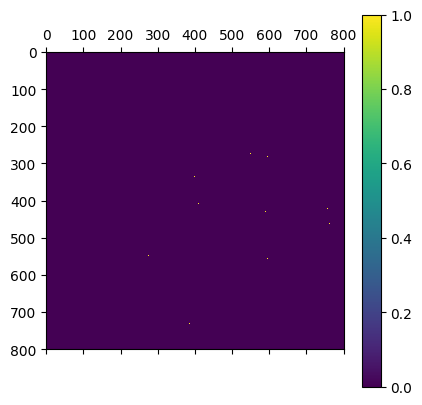

In [ ]:
plt.matshow(all_trips)
plt.colorbar()
plt.show()

## Tensor Decomposition

In [ ]:
!pip install tensorly

In [ ]:
import tensorly as tl
from tensorly.decomposition import tucker

In [ ]:
#Represent the trips as a tensor
tensor_trip = tl.tensor(trips_3darray, dtype='float64')

In [ ]:
tensor_trip.shape

(801, 801, 837)

In [ ]:
# Rank of Tucker decomposition
tucker_rank = [100, 100, 150]

In [ ]:
core, factors = tucker(tensor_trip, rank=tucker_rank, init='random', tol=10e-5,random_state=12345)

In [ ]:
#Convert the tucker tensor into a full tensor
tucker_rec = tl.tucker_to_tensor((core, factors))

In [ ]:
factors[0].shape

(801, 100)

In [ ]:
factors[1].shape

(801, 100)

In [ ]:
factors[2].shape

(837, 150)

In [ ]:
import requests

In [ ]:
response= requests.get('https://api.tfl.gov.uk/BikePoint/')
stations = response.json()

In [ ]:
data =  pd.DataFrame()
s_names = []
s_lat = []
s_lon = []

NbBikes = []
NbEmptyDocks = []
NbDocks = []
NbStandardBikes = []
NbEBikes = []
s_id = []

In [ ]:
len_lat = 0
for station in stations:
    s_names.append(station['commonName'])
    s_lat.append(float(station['lat']))
    s_lon.append(float(station['lon']))
    for add_property in station['additionalProperties']:
        if add_property['key'] == 'NbBikes':
            NbBikes.append(int(add_property['value']))
        if add_property['key'] == 'NbEmptyDocks':
            NbEmptyDocks.append(int(add_property['value']))
        if add_property['key'] == 'NbDocks':
            NbDocks.append(int(add_property['value']))
        if add_property['key'] == 'NbStandardBikes':
            NbStandardBikes.append(int(add_property['value']))
        if add_property['key'] == 'NbEBikes':
            NbEBikes.append(int(add_property['value']))
        if add_property['key'] == 'TerminalName':
            s_id.append(int(add_property['value']))


In [ ]:
data['Station_name'] = s_names
data['s_lat'] = s_lat
data['s_lon'] = s_lon
data['s_num_bikes'] = NbBikes
data['s_num_empty_docks'] = NbEmptyDocks
data['s_num_std_bikes'] = NbStandardBikes
data['s_num_e-bikes'] = NbEBikes
data['s_num_docks'] = data['s_num_bikes'] + data['s_num_empty_docks']
data['s_id'] = s_id

In [ ]:
data

,Station_name,s_lat,s_lon,s_num_bikes,s_num_empty_docks,s_num_std_bikes,s_num_e-bikes,s_num_docks,s_id
0,"River Street , Clerkenwell",51.529163,-0.109970,9,10,9,0,19,1023
1,"Phillimore Gardens, Kensington",51.499606,-0.197574,9,25,9,0,34,1018
2,"Christopher Street, Liverpool Street",51.521283,-0.084605,32,0,29,3,32,1012
3,"St. Chad's Street, King's Cross",51.530059,-0.120973,4,18,4,0,22,1013
4,"Sedding Street, Sloane Square",51.493130,-0.156876,21,5,20,1,26,3420
...,...,...,...,...,...,...,...,...,...
791,"Blenheim Crescent, Ladbroke Grove",51.515108,-0.208565,14,7,14,0,21,300090
792,"The Metropolitan, Portobello",51.520509,-0.200804,2,16,1,1,18,300244
793,"Bevington Road West, North Kensington",51.521200,-0.208888,7,17,7,0,24,300236
794,"Lansdowne Walk, Ladbroke Grove",51.509591,-0.204666,1,20,1,0,21,200065


In [ ]:
# South East limits
se_limit_lat = 51.523811 # everthing lower than this value is south east
se_limit_lon = -0.101342 # everything greater than this value is south east

# East limits
e_limit_lat = 51.523811 # everything greater than this value is east
e_limit_lon = -0.022306 # everything greater than this is east

# South West limits
sw_limit_lat = 51.501631 # everthing lower than this value is south east
sw_limit_lon = -0.101342 # everything lower than this value is south east

# West limits
w_limit_lat = 51.501072  # everthing greater than this value is south east
w_limit_lon = -0.182406  # everthing lower than this value is south east

# Central limits
c_toplimit_lat = 51.501072 # everthing greater than this value is central
c_lowlimit_lat = 51.523811 # everything lower than this value is central

c_toplimit_lon = -0.101342 # everything lower than this value is central
c_lowlimit_lon = -0.182406 # everthing greater than this value is central

# North limits
n_toplimit_lon = -0.022306 # everything lower than this value is central
n_lowlimit_lon = -0.182406 # everthing greater than this value is central

n_lowlimit_lat = 51.523811 # everthing greater than this value is central

In [ ]:
loc = []

In [ ]:
for station in data.index:
    if data['s_lat'][station] > c_toplimit_lat and data['s_lat'][station]< c_lowlimit_lat and data['s_lon'][station]< c_toplimit_lon and data['s_lon'][station]>c_lowlimit_lon:
        loc.append(1) # Central
    elif data['s_lon'][station] < n_toplimit_lon and data['s_lon'][station] > n_lowlimit_lon and data['s_lat'][station] > n_lowlimit_lat:
        loc.append(2) # North
    elif data['s_lon'][station] < w_limit_lon and data['s_lat'][station] > w_limit_lat:
        loc.append(3) # West
    elif data['s_lon'][station] < sw_limit_lon and data['s_lat'][station] < sw_limit_lat:
        loc.append(4)  # South_West
    elif data['s_lon'][station] > e_limit_lon and data['s_lat'][station] > e_limit_lat:
        loc.append(5) # East
    elif data['s_lon'][station] > se_limit_lon and data['s_lat'][station] < se_limit_lat:
        loc.append(6) # South East
    else:
        loc.append('Other')

In [ ]:
data['Area_loc'] = loc

In [ ]:
data

,Station_name,s_lat,s_lon,s_num_bikes,s_num_empty_docks,s_num_std_bikes,s_num_e-bikes,s_num_docks,s_id,Area_loc
0,"River Street , Clerkenwell",51.529163,-0.109970,9,10,9,0,19,1023,2
1,"Phillimore Gardens, Kensington",51.499606,-0.197574,9,25,9,0,34,1018,4
2,"Christopher Street, Liverpool Street",51.521283,-0.084605,32,0,29,3,32,1012,6
3,"St. Chad's Street, King's Cross",51.530059,-0.120973,4,18,4,0,22,1013,2
4,"Sedding Street, Sloane Square",51.493130,-0.156876,21,5,20,1,26,3420,4
...,...,...,...,...,...,...,...,...,...,...
791,"Blenheim Crescent, Ladbroke Grove",51.515108,-0.208565,14,7,14,0,21,300090,3
792,"The Metropolitan, Portobello",51.520509,-0.200804,2,16,1,1,18,300244,3
793,"Bevington Road West, North Kensington",51.521200,-0.208888,7,17,7,0,24,300236,3
794,"Lansdowne Walk, Ladbroke Grove",51.509591,-0.204666,1,20,1,0,21,200065,3


In [ ]:
data.loc[data.Station_name == 'Chepstow Villas, Notting Hill'].values[0][9]

3

In [ ]:
color_stations = []
for station in total_uniq_stations:
  info_val = data.loc[data.Station_name == station].values
  if len(info_val)>0:
    color_stations.append(data.loc[data.Station_name == station].values[0][9])
  else:
    color_stations.append(7)

In [ ]:
len(color_stations)

801

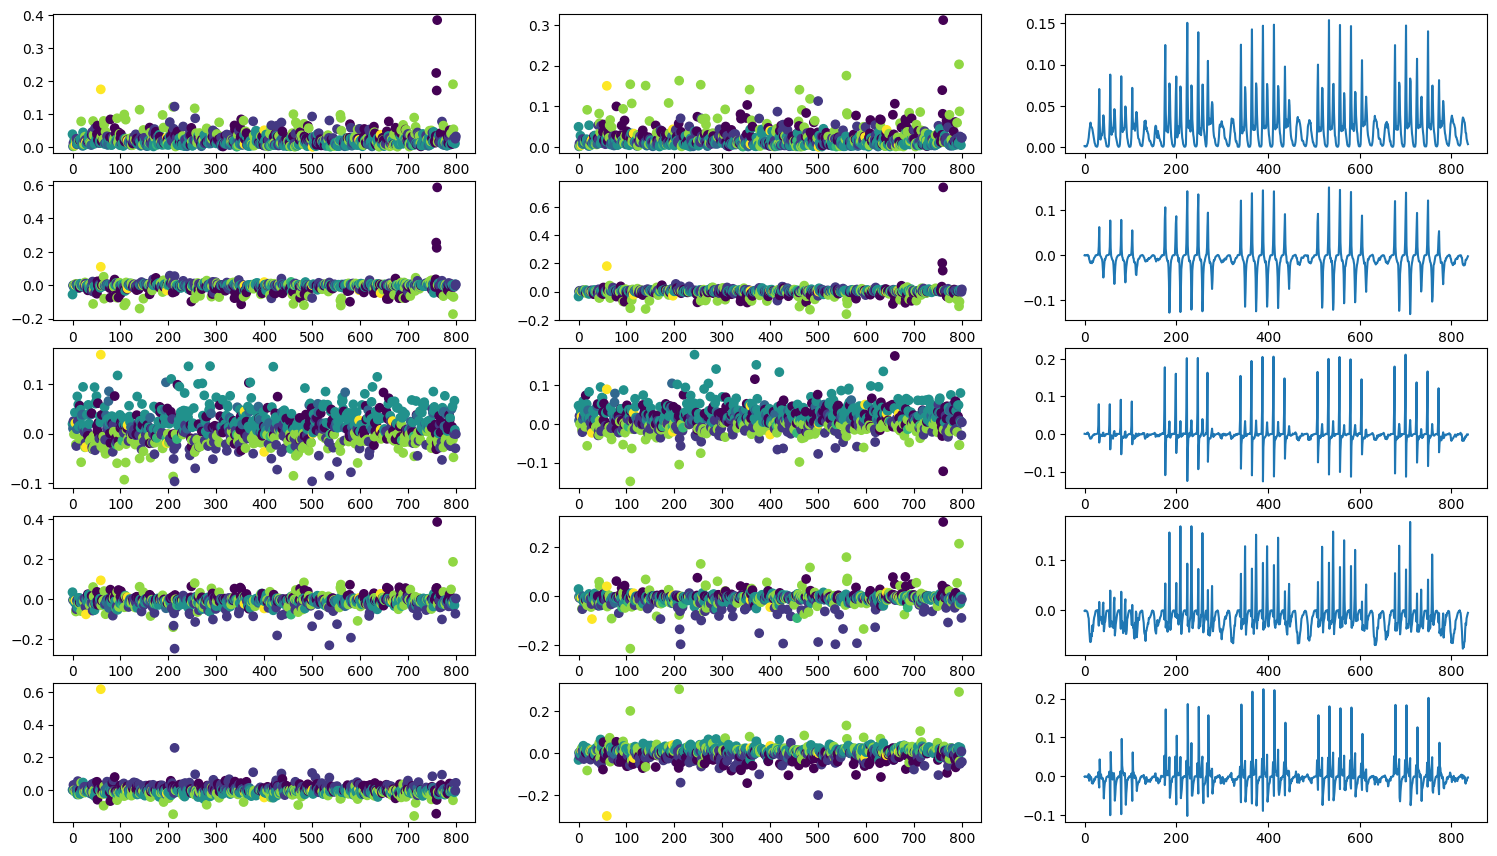

In [ ]:
fig, axs = plt.subplots(5, 3)
fig.set_size_inches(18.5, 10.5)
axs[0, 0].scatter(x=range(len(factors[0])), y=np.transpose(factors[0])[0], c=color_stations)
axs[0, 1].scatter(x=range(len(factors[1])), y=np.transpose(factors[1])[0], c=color_stations)
axs[0, 2].plot(np.transpose(factors[2])[0])

axs[1, 0].scatter(x=range(len(factors[0])), y=np.transpose(factors[0])[1], c=color_stations)
axs[1, 1].scatter(x=range(len(factors[1])), y=np.transpose(factors[1])[1], c=color_stations)
axs[1, 2].plot(np.transpose(factors[2])[1])

axs[2, 0].scatter(x=range(len(factors[0])), y=np.transpose(factors[0])[2], c=color_stations)
axs[2, 1].scatter(x=range(len(factors[1])), y=np.transpose(factors[1])[2], c=color_stations)
axs[2, 2].plot(np.transpose(factors[2])[2])

axs[3, 0].scatter(x=range(len(factors[0])), y=np.transpose(factors[0])[3], c=color_stations)
axs[3, 1].scatter(x=range(len(factors[1])), y=np.transpose(factors[1])[3], c=color_stations)
axs[3, 2].plot(np.transpose(factors[2])[3])

axs[4, 0].scatter(x=range(len(factors[0])), y=np.transpose(factors[0])[4], c=color_stations)
axs[4, 1].scatter(x=range(len(factors[1])), y=np.transpose(factors[1])[4], c=color_stations)
axs[4, 2].plot(np.transpose(factors[2])[4])

In [ ]:
factors[2].shape

(837, 150)

In [ ]:
type(factors[2])

numpy.ndarray

In [ ]:
from google.colab import files

In [ ]:
# convert array into dataframe
result_df = pd.DataFrame(factors[2])

In [ ]:
result_df['timestamp'] = pd.to_datetime(total_hours)

In [ ]:
result_df.to_csv('filename.csv')
files.download('filename.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>